## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [110]:
df = pd.read_csv(r'CC GENERAL.csv')

In [112]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [114]:
df = df.fillna(0)

In [116]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [119]:
df = pd.get_dummies(df)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [123]:
X = pd.get_dummies(df)

In [125]:
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CUST_ID_C19181,CUST_ID_C19182,CUST_ID_C19183,CUST_ID_C19184,CUST_ID_C19185,CUST_ID_C19186,CUST_ID_C19187,CUST_ID_C19188,CUST_ID_C19189,CUST_ID_C19190
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,False,False,False,False,False,False,False,False,False,False
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,False,False,False,False,False,False,False,False,False,False
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,False,False,False,False,False,True,False,False,False,False
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,False,False,False,False,False,False,True,False,False,False
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,False,False,False,False,False,False,False,True,False,False
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,False,False,False,False,False,False,False,False,True,False


## K-Means

Find the optimal Kmeans model

In [127]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

In [131]:
scaled_X = scaler.fit_transform(X)

In [133]:
from sklearn.cluster import KMeans

In [135]:
model = KMeans(n_clusters=2)

In [137]:
cluster_labels = model.fit_predict(scaled_X)

In [139]:
len(scaled_X)

8950

In [141]:
len(cluster_labels)

8950

In [143]:
cluster_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Choose the optimal K and calculate the silhouette score for the best model.

In [145]:
ssd = []

for k in range(2,5):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

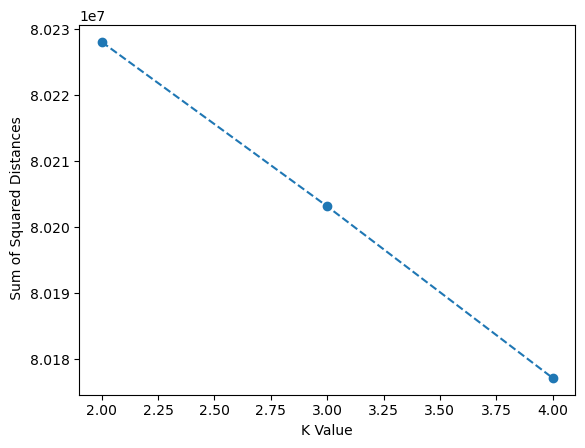

In [147]:
plt.plot(range(2,5),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [149]:
ssd

[80228056.83819854, 80203147.93845522, 80177144.6715209]

In [151]:
pd.Series(ssd).diff()

0             NaN
1   -24908.899743
2   -26003.266934
dtype: float64

<Axes: >

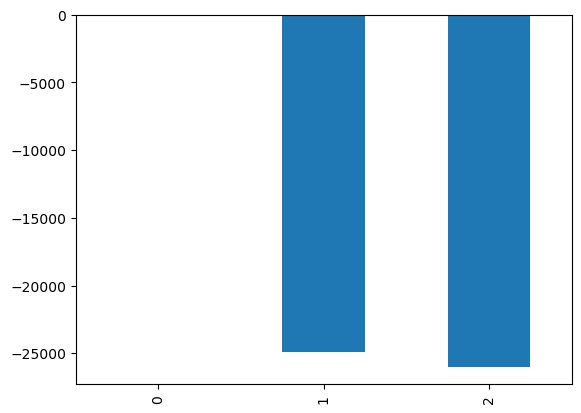

In [153]:
pd.Series(ssd).diff().plot(kind='bar')

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [48]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [63]:
s=[]
linkage_list=["average"]
affinity_list=["manhattan"]
n=np.arange(2,4)
best=-1
best_affinity=" "
best_n=1
best_linkage= " "
for n_clusters in n:
    for metric in affinity_list:
           for linkage in linkage_list:
                model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
                model = model.fit(df)
                silhouette=silhouette_score(df,model.labels_)#,metric='euclidean')
                s.append(silhouette)
                #print("Silhouette Score for number of clusters = "+ str(n_clusters)+ " "+str(affinity)+" and "+str(linkage)+" is "+str(silhouette)+".")
                if silhouette >= best:
                    best_n=n_clusters
                    best =silhouette 
                    best_affinity=metric
                    best_linkage=linkage
print("Best agglomerative clustering model for this data is number of clusters="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Best agglomerative clustering model for this data is number of clusters= 2 with linkage of average and affinity of manhattan.Silhouette Score is 0.9057107114170702.


In [67]:
model = AgglomerativeClustering(n_clusters=2, metric="manhattan", linkage = "average")

Choose the optimal K and calculate the silhouette score for the best model.

In [69]:
cluster_labels = model.fit_predict(df)

In [71]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
silhouette_score(df, cluster_labels)

0.9057107114170702

## DBSCAN

Find the optimal DBSCAN model.

In [167]:
cluster_labels = dbscan.fit_predict(scaled_X)

In [165]:
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [169]:
cluster_labels

array([-1, -1, -1, ..., -1, -1, -1])

In [177]:
outlier_percent = []

for eps in np.linspace(0.001,5,50) :
    min_samples = 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

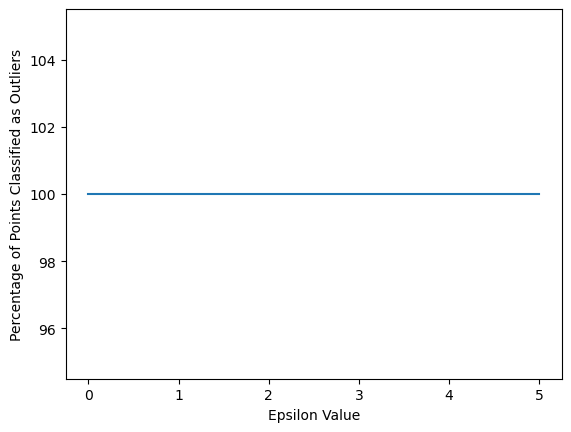

In [179]:
sns.lineplot(x=np.linspace(0.001,5,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [181]:
dbscan = DBSCAN(eps=2)

In [183]:
from sklearn.metrics import silhouette_score
silhouette_score(df, cluster_labels)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?